In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from IPython.display import Markdown, display


plt.style.use("ggplot")
sns.set_theme()
pd.set_option("display.max_columns",None)

## Chargement du dataset et appercu general

In [24]:
#charge le dataset
df = pd.read_csv("netflix_titles.csv")

print("Shape (lignes,colonnes) :",df.shape)
display(df.head())

df.info()

df.describe(include="all").T

Shape (lignes,colonnes) : (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Valeurs manquantes et doublons

In [25]:
#Valeurs manquantes par colonnes
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
#pourcentage de valeurs manquantes par colonnes
(df.isna().mean()*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [27]:
#Doublons
print("Nombres de lignes dupliquee :",df.duplicated().sum())

Nombres de lignes dupliquee : 0


## Nettoyage

In [28]:
#S'occupe des dates pas formatte pareill.
#Split en 2 colonnes; date added en datetime , year added et month added.
df["date_added"] = pd.to_datetime(df["date_added"],
    format="mixed"
    )
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

print(df[["date_added", "year_added", "month_added"]].head())

  date_added  year_added  month_added
0 2021-09-25      2021.0          9.0
1 2021-09-24      2021.0          9.0
2 2021-09-24      2021.0          9.0
3 2021-09-24      2021.0          9.0
4 2021-09-24      2021.0          9.0


In [29]:
#extrait la partie int de la duration.
df["duration_int"] = (
    df["duration"].str.extract(r"(\d+)").astype(float)
)

#visualisation et check
df[["type","duration","duration_int"]].head()

,type,duration,duration_int
0,Movie,90 min,90.0
1,TV Show,2 Seasons,2.0
2,TV Show,1 Season,1.0
3,TV Show,1 Season,1.0
4,TV Show,2 Seasons,2.0


In [30]:
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0


## Analyse des contenus

### Films vs séries : proportions, tendances par année

### Genre principaux

### Repartition geographique

### Casting & réalisateurs : analyse simple (comptages, noms fréquents)

## Analyse Temporelle

### Analyse de la distribution par année de sortie 

*Nous examinons ici l'année de sortie réelle des films et séries du catalogue,  
afin de comprendre l'âge des contenus proposés par Netflix et repérer les  
périodes de nouveautés et contenus exclusifs de Netflix.* 



##### 1. Distribution des années de sortie

Nous analysons ici les années de sortie des contenus Netflix regroupées en blocs par décénies.   
Cela permet de visualiser facilement quelles périodes sont les plus représentées dans le catalogue Netflix.

C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\3636733081.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")


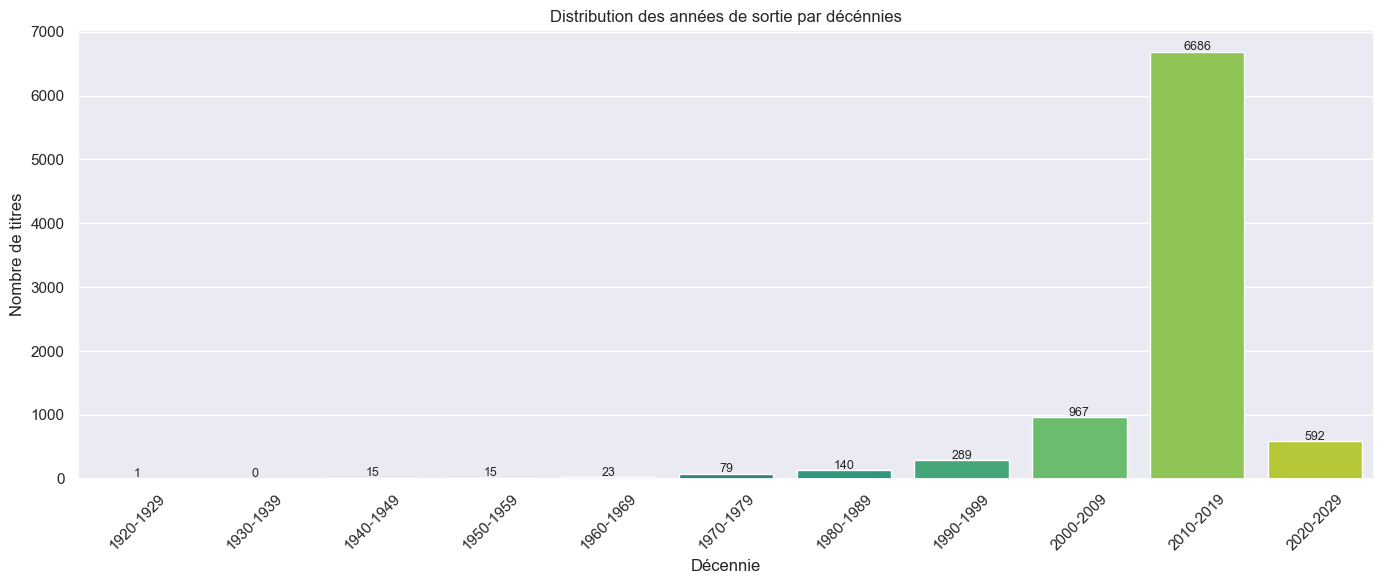

In [56]:
# Analyse 1 : Distribution par blocs de 10 ans (début 1920)

# retirer les NA
release_years = df["release_year"].dropna().astype(int)

# definir les décénies
start_year = 1920
end_year = release_years.max()
bins = list(range(start_year, end_year + 11, 10))  # pas de 10 ans
labels = [f"{b}-{b+9}" for b in bins[:-1]]
decade_groups = pd.cut(
    release_years,
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# comptage
decade_counts = decade_groups.value_counts().sort_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")

# annoter
for i, value in enumerate(decade_counts.values):
    ax.text(i, value + 20, str(value), ha="center", fontsize=9)

plt.title("Distribution des années de sortie par décénnies")
plt.xlabel("Décennie")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
# pourcentage de l'échentillon sorti en 2010-2019
release_years = df["release_year"].dropna().astype(int)
mask_2010_2019 = (release_years >= 2010) & (release_years <= 2019)

percent_2010_2019 = round(mask_2010_2019.mean() * 100, 2)
percent_2010_2019

np.float64(67.3)

Le graphique montre clairement quelles décennies dominent le catalogue.  
Les décennies avant 1980 proposent très peu de contenu.  
Les années 2000, (surtout la décénnie 2010–2019 qui représente 67.3% de l'échantillon à elle seule)  
représentent une énorme partie du contenu disponible.  

Cela montre que Netflix priorise surtout les oeuvres récentes, et il y a aussi un corrélation avec la période ou Netflix  
a commencé à investir beaucoup de budget dans du contenus original.

##### 2. Évolution des Films vs Séries par décénnie

Cette analyse compare le nombre de films et de séries selon leur décennie de
sortie. Ça permet d'observer les tendances de production par type de contenu
et de voir ce qui domine chaque décennie (film ou série).


C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\1588397716.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_decade.groupby(["decade", "type"])


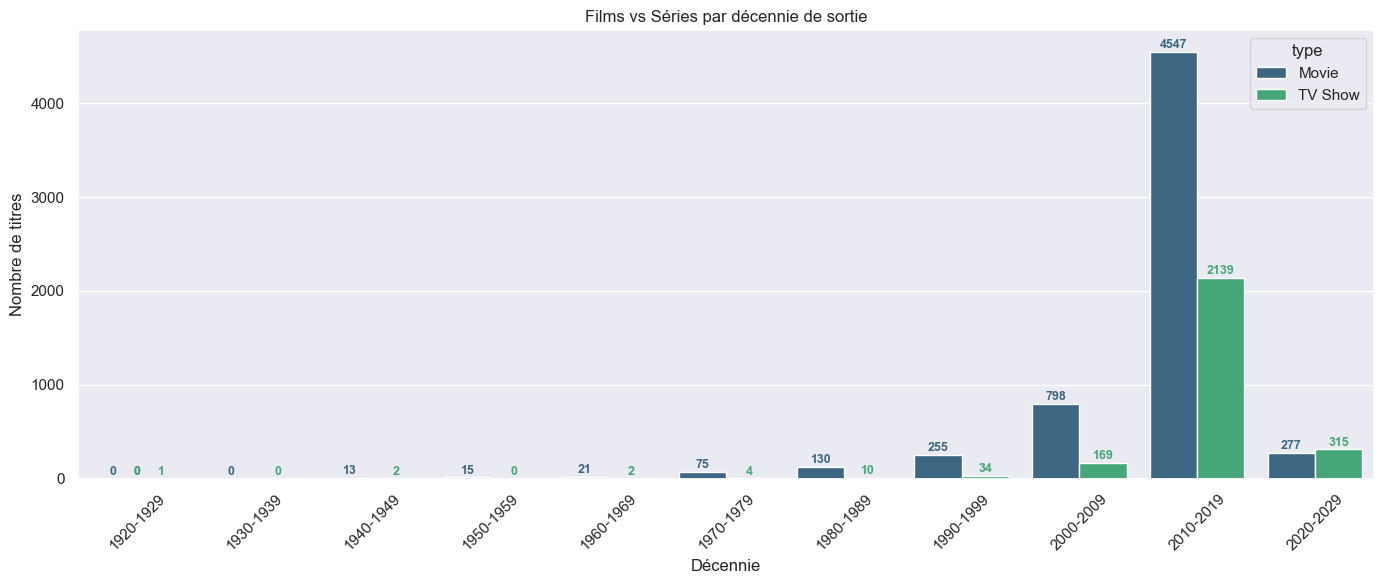

In [58]:

df_decade = df.copy()

df_decade["type"] = (
    df_decade["type"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({"Tv Show": "TV Show"})
)

release_years = df_decade["release_year"].dropna().astype(int)
start_decade = 1920
end_decade = release_years.max()

bins = list(range(start_decade, end_decade + 11, 10))
decade_labels = [f"{b}-{b+9}" for b in bins[:-1]]

df_decade["decade"] = pd.cut(
    release_years,
    bins=bins,
    labels=decade_labels,
    right=True,
    include_lowest=True
)

type_by_decade = (
    df_decade.groupby(["decade", "type"])
             .size()
             .reset_index(name="count")
             .dropna()
)

plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=type_by_decade,
    x="decade",
    y="count",
    hue="type",
    palette="viridis"
)

for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 5

    color = patch.get_facecolor()

    ax.text(
        x,
        y,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9,
        color=color,
        fontweight="bold"
    )

plt.title("Films vs Séries par décennie de sortie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Analyse des genres par décennie

Cette analyse examine quels genres sont les plus représentés dans chaque
décennie de sortie. En regroupant les titres par blocs de 10 ans, on peut
observer les tendances culturelles : quels genres dominent certaines
périodes, et comment les préférences évoluent dans le temps.


C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\4161928814.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genres.groupby(["decade", "main_genre"])


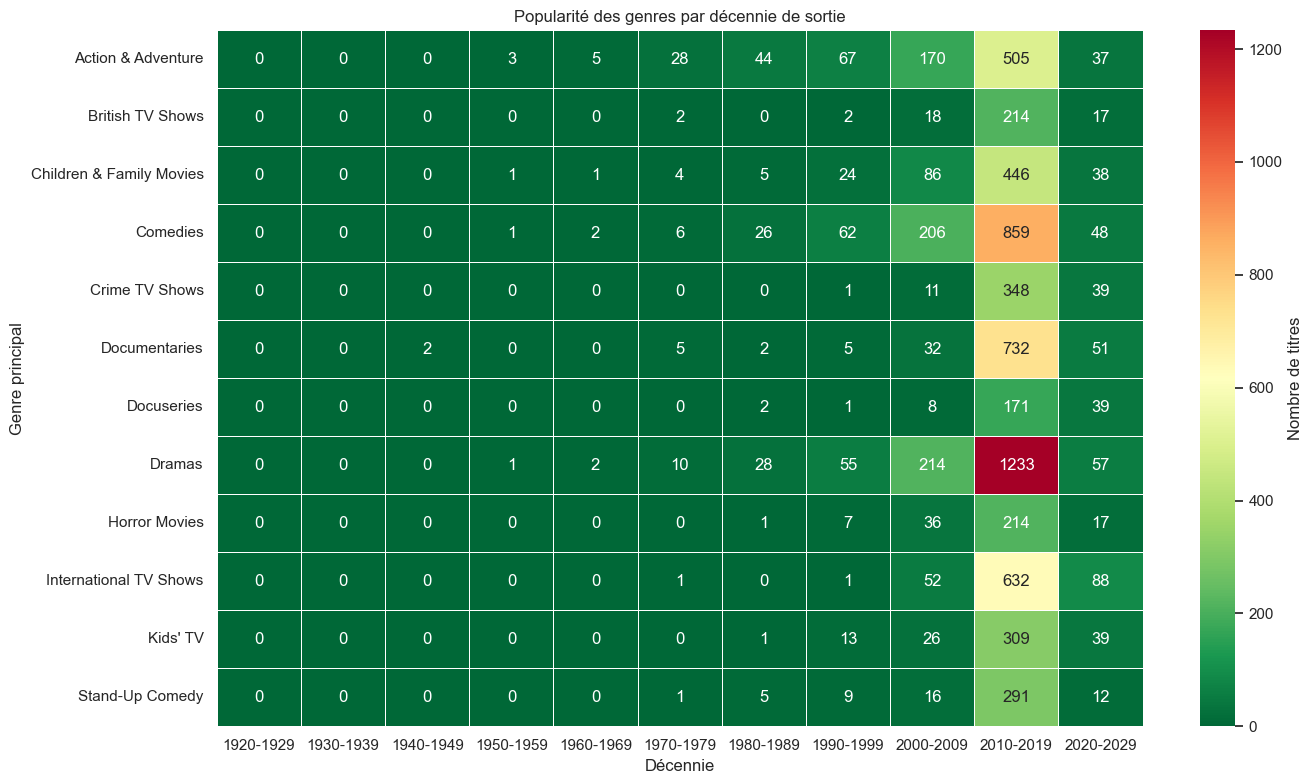

In [60]:

df_genres = df.copy()
df_genres["type"] = (
    df_genres["type"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({"Tv Show": "TV Show"})
)
df_genres["main_genre"] = (
    df_genres["listed_in"]
    .astype(str)
    .str.split(",")
    .str[0]
    .str.strip()
)

# regroup en decennie

release_years = df_genres["release_year"].dropna().astype(int)

start_decade = 1920
end_decade = release_years.max()

bins = list(range(start_decade, end_decade + 11, 10))
decade_labels = [f"{b}-{b+9}" for b in bins[:-1]]

df_genres["decade"] = pd.cut(
    release_years,
    bins=bins,
    labels=decade_labels,
    right=True,
    include_lowest=True
)

# comptasge nb de titre par genre et decennie

genre_by_decade = (
    df_genres.groupby(["decade", "main_genre"])
             .size()
             .reset_index(name="count")
)

# garder 12 genres les plus frequent
top_genres = (
    df_genres["main_genre"]
    .value_counts()
    .head(12)
    .index
)

genre_by_decade_top = genre_by_decade[genre_by_decade["main_genre"].isin(top_genres)]
pivot_genre = genre_by_decade_top.pivot(
    index="main_genre",
    columns="decade",
    values="count"
).fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot_genre,
    cmap="RdYlGn_r",
    linewidths=0.5,
    linecolor="white",
    annot=True,
    fmt=".0f",
    cbar_kws={"label": "Nombre de titres"}
)

plt.title("Popularité des genres par décennie de sortie")
plt.xlabel("Décennie")
plt.ylabel("Genre principal")
plt.tight_layout()
plt.show()


##### 4. Analyse des pays par décennie

Cette analyse étudie les pays les plus représentés selon la décennie de sortie.  
Elle permet d'observer l’évolution de la diversité géographique des productions.


C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\378356412.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country.groupby(["decade", "main_country"])


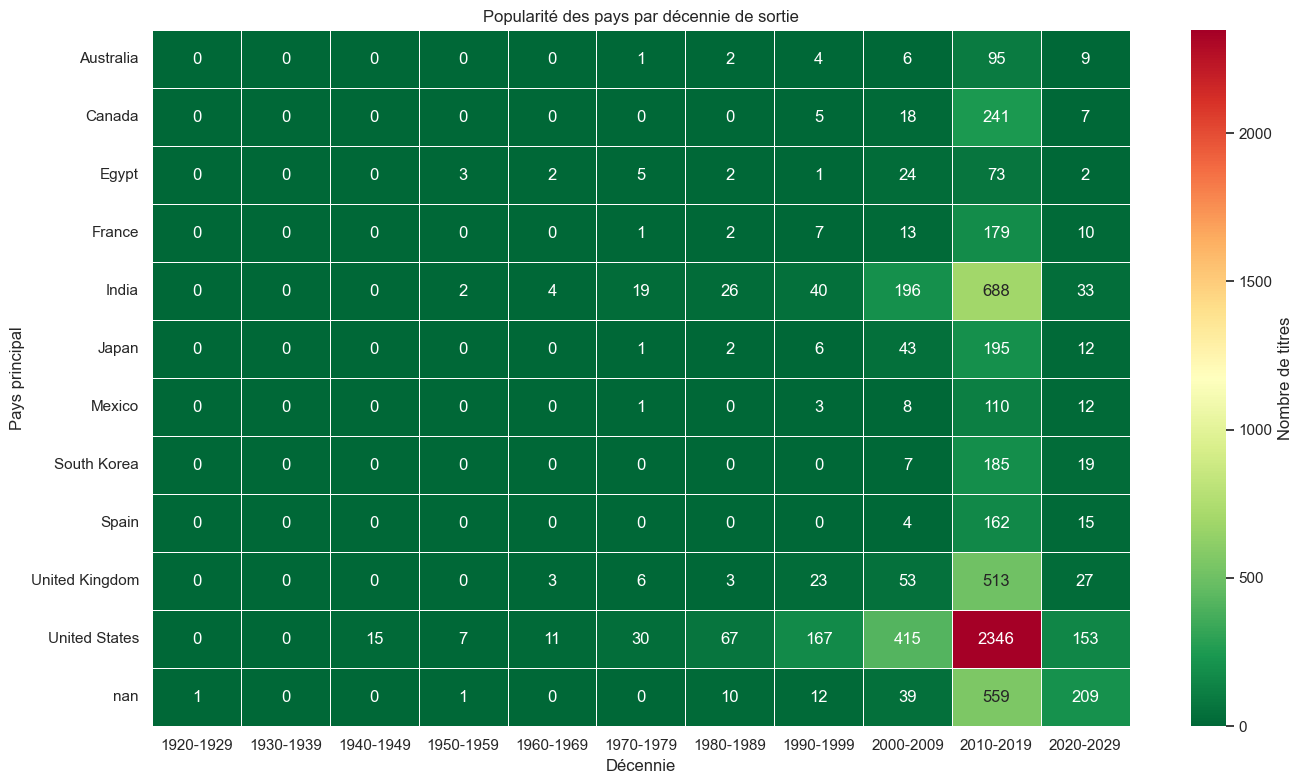

In [61]:

df_country = df.copy()

# nettoyage
df_country["main_country"] = (
    df_country["country"]
    .astype(str)
    .str.split(",")
    .str[0]
    .str.strip()
)

# regrouper en decennie
release_years = df_country["release_year"].dropna().astype(int)
start_decade = 1920
end_decade = release_years.max()

bins = list(range(start_decade, end_decade + 11, 10))
decade_labels = [f"{b}-{b+9}" for b in bins[:-1]]

df_country["decade"] = pd.cut(
    release_years,
    bins=bins,
    labels=decade_labels,
    right=True,
    include_lowest=True
)

# comptage de nombre de titre par pays/decennie

country_by_decade = (
    df_country.groupby(["decade", "main_country"])
              .size()
              .reset_index(name="count")
)

top_countries = (
    df_country["main_country"]
    .value_counts()
    .head(12)
    .index
)

country_by_decade_top = country_by_decade[
    country_by_decade["main_country"].isin(top_countries)
]
pivot_country = country_by_decade_top.pivot(
    index="main_country",
    columns="decade",
    values="count"
).fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot_country,
    cmap="RdYlGn_r",
    linewidths=0.5,
    linecolor="white",
    annot=True,
    fmt=".0f",
    cbar_kws={"label": "Nombre de titres"}
)

plt.title("Popularité des pays par décennie de sortie")
plt.xlabel("Décennie")
plt.ylabel("Pays principal")
plt.tight_layout()
plt.show()


##### 4. Analyse des pays par décennie

Cette analyse étudie les pays les plus représentés dans le catalogue Netflix
en fonction de la décennie de sortie. Elle permet d'observer l’évolution de la
diversité géographique des productions au fil du temps.


C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\2038489341.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country.groupby(["decade", "main_country"])


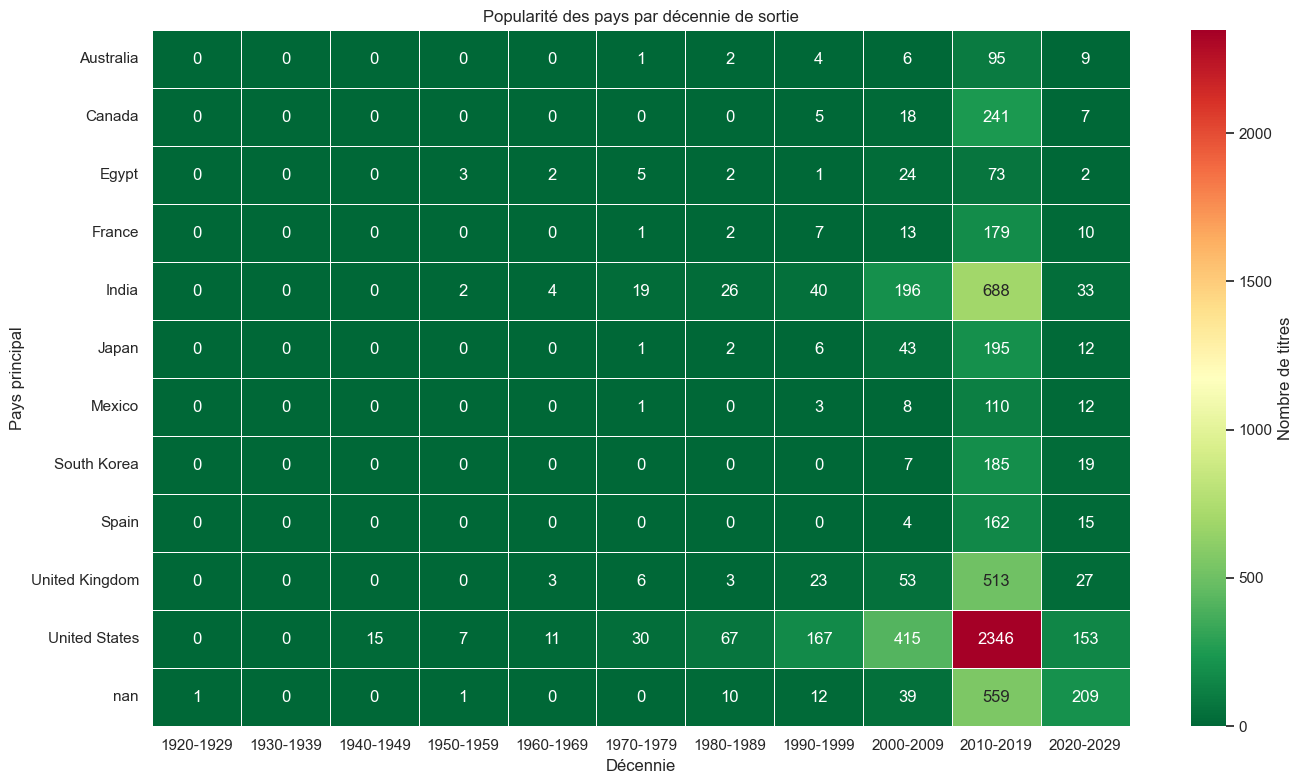

In [62]:
df_country = df.copy()

df_country["main_country"] = (
    df_country["country"]
    .astype(str)
    .str.split(",")
    .str[0]
    .str.strip()
)


release_years = df_country["release_year"].dropna().astype(int)

start_decade = 1920
end_decade = release_years.max()

bins = list(range(start_decade, end_decade + 11, 10))
decade_labels = [f"{b}-{b+9}" for b in bins[:-1]]

df_country["decade"] = pd.cut(
    release_years,
    bins=bins,
    labels=decade_labels,
    right=True,
    include_lowest=True
)

# comptage nb de titre par décennie et pays

country_by_decade = (
    df_country.groupby(["decade", "main_country"])
              .size()
              .reset_index(name="count")
)

# 12 pays les plus représentés
top_countries = (
    df_country["main_country"]
    .value_counts()
    .head(12)
    .index
)

country_by_decade_top = country_by_decade[
    country_by_decade["main_country"].isin(top_countries)
]

pivot_country = country_by_decade_top.pivot(
    index="main_country",
    columns="decade",
    values="count"
).fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot_country,
    cmap="RdYlGn_r",
    linewidths=0.5,
    linecolor="white",
    annot=True,
    fmt=".0f",
    cbar_kws={"label": "Nombre de titres"}
)

plt.title("Popularité des pays par décennie de sortie")
plt.xlabel("Décennie")
plt.ylabel("Pays principal")
plt.tight_layout()
plt.show()


**Résultat**

La heatmap montre :

- Domination des **États-Unis**, surtout avant 2000.
- Augmentation du nombre de pays représentés après 2000.
- Une forte internationalisation dans les années 2010–2019, avec la montée de
  l’Inde, Royaume-Uni, Canada Japon, Corée du Sud.

Récemment, le catalogue Netflix devient de plus en plus diversifié géographiquement,


### Analyse des dates d'ajout au catalogue


*Cette partie s'intéresse aux dates d'ajout des contenus sur Netflix.  
Elle permet de comprendre comment le catalogue évolue :  
rythme d'ajout, saisonnalité, différences entre films et séries, et périodes  
plus ou moins actives.*

##### 1. Titres ajoutés par année

Commençons par comptabiliser le nombre de contenus qui ont été ajoutés chaque année sur Netflix.  
Cette analyse permet de visualiser la croissance du catalogue.  
On cherche à identifier :  
- Les périodes d’expansion rapide
- Les années particulièrement actives
- Les ralentissements éventuels
- Les tendances générales 

C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\144633033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


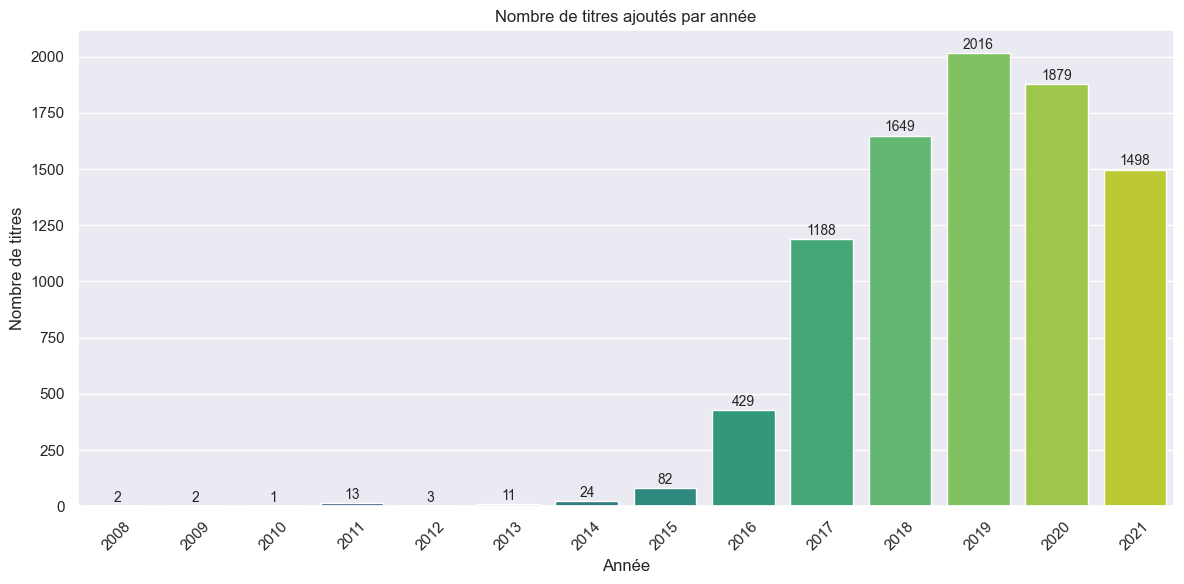

In [49]:
# Analyse #1 : nb de titres ajoutés par année

# conversion en int pour éviter les .0 après l'année
year_counts = df["year_added"].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
for i, value in enumerate(year_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Nombre de titres ajoutés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Titres ajoutés selon le mois de l'année

**2.1** - Dans cette section, nous regroupons tous les ajouts Netflix par mois.   
Ça nous permet de voir si il y a un facteur saisonnier dans le rythme d'ajout de contenus.

C:\Users\olivier\AppData\Local\Temp\ipykernel_7824\340099577.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_ticks, y=month_counts.values, palette="viridis")


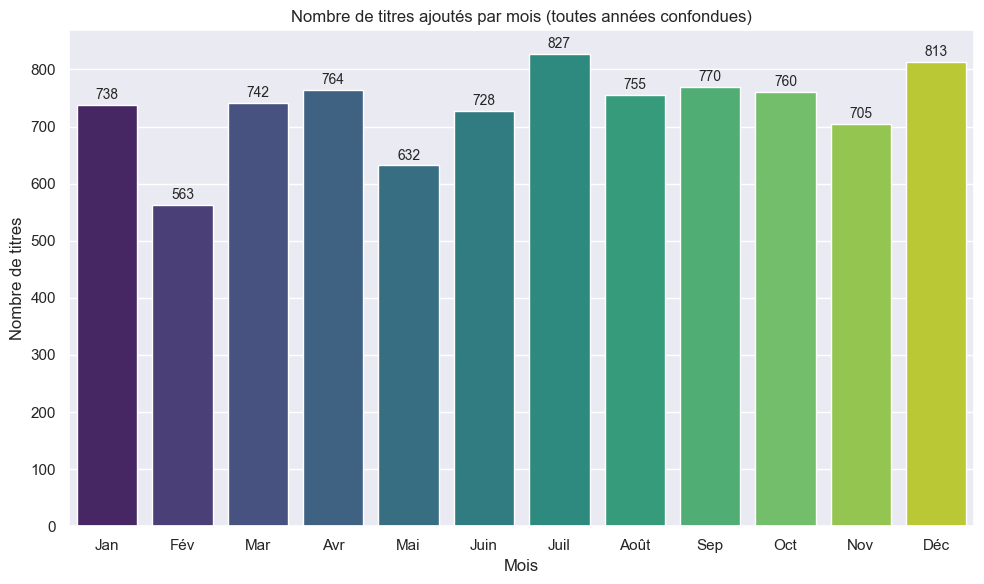

In [50]:
# Analyse 2 : titres ajoutés par mois

month_series = df["month_added"].dropna().astype(int)
month_counts = month_series.value_counts().sort_index()
month_labels = {
    1: "Jan", 2: "Fév", 3: "Mar", 4: "Avr",
    5: "Mai", 6: "Juin", 7: "Juil", 8: "Août",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Déc"
}
x_ticks = [month_labels[m] for m in month_counts.index]

plt.figure(figsize=(10,6))
ax = sns.barplot(x=x_ticks, y=month_counts.values, palette="viridis")

for i, value in enumerate(month_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Nombre de titres ajoutés par mois (toutes années confondues)")
plt.xlabel("Mois")
plt.ylabel("Nombre de titres")
plt.tight_layout()
plt.show()


**2.2** - Moyenne des ajouts par mois

Voici aussi le nombre moyen de titres ajoutés pour chaque mois regroupés par année.  
Cela permet de comparer équitablement les mois entre eux.

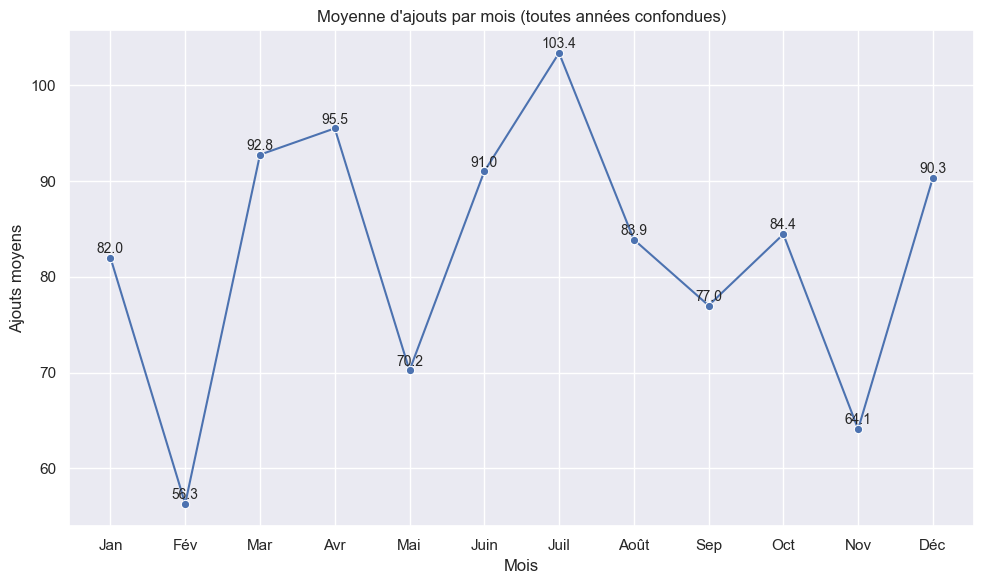

In [51]:
# Analyse 2.2 : moyenne ajouts par moi

df_copy = df.copy()
df_copy["year_added"] = df_copy["date_added"].dt.year
df_copy["month_added"] = df_copy["date_added"].dt.month

monthly_per_year = df_copy.groupby(["year_added", "month_added"]).size().reset_index(name="count")

# moyenne des ajouts par mois
monthly_mean = monthly_per_year.groupby("month_added")["count"].mean()
x_ticks = [month_labels[m] for m in monthly_mean.index]
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=x_ticks, y=monthly_mean.values, marker="o")


for i, value in enumerate(month_mean := monthly_mean.values):
    ax.text(i, value + 0.5, f"{value:.1f}", ha='center', fontsize=10)

plt.title("Moyenne d'ajouts par mois (toutes années confondues)")
plt.xlabel("Mois")
plt.ylabel("Ajouts moyens")
plt.tight_layout()
plt.show()


**2.3** - Comparaison

Les deux graphiques montrent la saisonnalité des ajouts Netflix sous deux angles :

**Cumul total**
- Reflète le total d’ajouts par mois pour tous les ans combinés.

**Moyenne par mois**
- Neutralise l'effet de croissance des dernières années.

**Conclusion**
- **Juillet** est réellement le mois le plus chargé, indépendamment du volume global.
- **Février** est le mois le plus calme.


##### 3. Heatmap des ajouts par année et par mois

Cette heatmap montre la répartition des ajouts pour chaque combinaison année/mois.  
Cela nous permet d’identifier les périodes les plus actives.

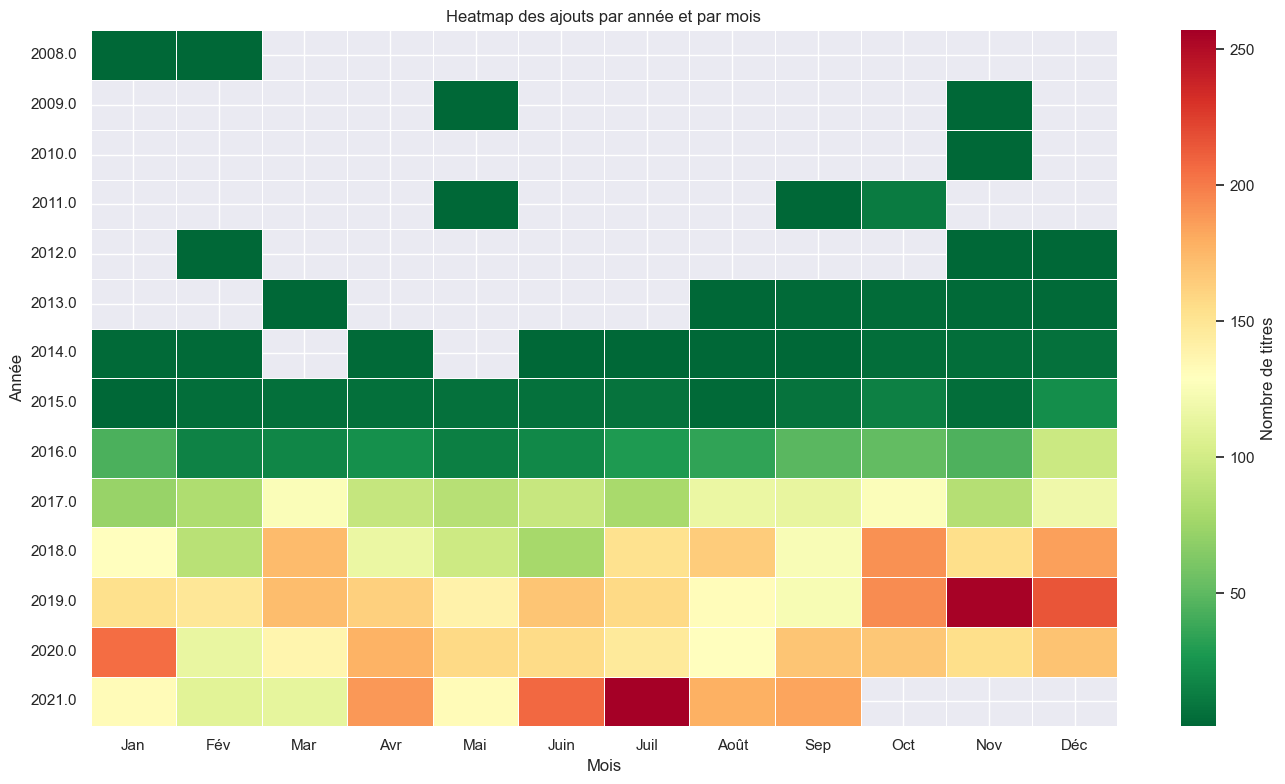

In [52]:
# Analyse 3 : Heatmap Année × Mois (cmap vert -> rouge)

pivot = df.pivot_table(
    index="year_added",
    columns="month_added",
    values="show_id",
    aggfunc="count"
)

month_labels = ["Jan", "Fév", "Mar", "Avr", "Mai", "Juin",
                "Juil", "Août", "Sep", "Oct", "Nov", "Déc"]

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot,
    cmap="RdYlGn_r",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Nombre de titres"},
    xticklabels=month_labels
)

plt.title("Heatmap des ajouts par année et par mois")
plt.xlabel("Mois")
plt.ylabel("Année")
plt.tight_layout()
plt.show()


**Résultat**

La heatmap montre l’évolution des ajouts Netflix :

- **Avant 2015** : très peu d’ajouts.
- **2016–2019** : forte croissance avec des volumes plus réguliers et élevés.
- **2019** : année record, plusieurs mois dépassent 200 ajouts.
- **Juillet 2021** et **Novembre 2019** sont les mois records

**juillet**, **novembre** et **décembre** sont régulièrement parmi les mois les plus actifs,  
 tandis que **février** et **mai** restent plus calme à travers les années.

##### 4. Évolution des ajouts de films VS séries dans le temps

Cette analyse montre comment le nombre de films et de séries ajoutés
chaque année évolue.

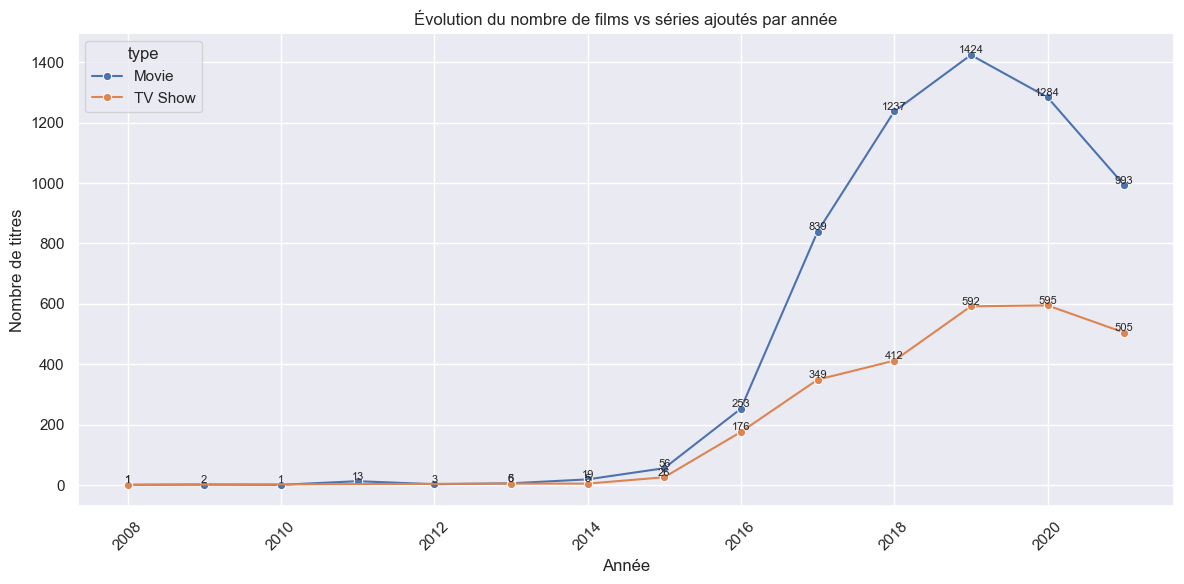

In [53]:
# Analyse 4 : films vs serie / annee

type_counts = (
    df.groupby(["year_added", "type"])
      .size()
      .reset_index(name="count")
)

plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=type_counts,
    x="year_added",
    y="count",
    hue="type",
    marker="o"
)

# annotation
for _, row in type_counts.iterrows():
    plt.text(
        row["year_added"],
        row["count"] + 5,
        str(int(row["count"])),
        ha="center",
        fontsize=8
    )

plt.title("Évolution du nombre de films vs séries ajoutés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualistion Interactive

### Représentations obligatoires :

### histogrammes, countplots, boxplots (Seaborn / Matplotlib)
### visualisations interactives (Plotly)

### Choix libres : nuages de mots, diagrammes circulaires, timelines, etc.

## Synthèse


### Résumé des observations principales.

### Tendances remarquables (contenus récents, pays dominants, genrespopulaires).
